## Data aggregation

Goal: create 1 dataset with relevant synthesis parameters and measurement outcomes for everything I've made

Columns in output: UUID, volume fractions of everything, fit results processed with Null if version wasn't best

In [3]:
%load_ext autoreload
%autoreload 2

In [46]:
import pandas as pd
import json
import matplotlib.pyplot as plt

## Load synthesis files

In [5]:
synthesis_files = ['/home/bgpelkie/Code/silica-np-synthesis/2024_10_14_highlights_replicates/2024_10_14_highlights_replicates_sampletable.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_07_randomSampleV3/Sample_table_2024_10_07_randomsampleV3.csv', 
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_04_RandomBaseline_v2/Sample_table_2024_10_04_randomsampleV2.csv', 
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_10_17_RandomBaselineV4/Sample_table_2024_10_17_RandomBaselineV4.csv',
                   '/home/bgpelkie/Code/silica-np-synthesis/2024_11_04_OptimizationRound1/SampleTable_2024_11_04_OptimizationRound1.csv'] 

In [6]:
synth_tables = []

for fp in synthesis_files:
    data= pd.read_csv(fp)
    synth_tables.append(data)

synth_table = pd.concat(synth_tables, axis = 0)

In [7]:
synth_table

,Unnamed: 0.1,Unnamed: 0,uuid,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,well,ethanol_dilute_vol,sample_dilute_vol,dilute_well
0,0.0,0.0,4fd21940-a331-4524-b730-cf76de1b4d8d,50.000000,124.000000,165.000000,1361.000000,0.362682,7.951422,0.009674,A1,NaN,NaN,NaN
1,2.0,2.0,8933d4b1-8929-4b58-a491-a0c55df30fed,83.000000,58.000000,175.000000,1384.000000,0.218193,13.216927,0.016085,A2,NaN,NaN,NaN
2,5.0,5.0,130093e4-2947-4d37-b73a-ed4c23442ab8,20.000000,64.000000,49.000000,1567.000000,0.903794,3.190814,0.003982,A3,NaN,NaN,NaN
3,6.0,6.0,a3f7d49b-cc77-4468-aae0-ad451027ddc0,181.000000,9.000000,228.000000,1283.000000,0.100743,28.625618,0.034357,A4,NaN,NaN,NaN
4,8.0,8.0,f69628da-ff56-4f3a-ba2e-816036b87557,100.000000,52.000000,15.000000,1534.000000,0.182971,15.761151,0.019630,A5,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15,NaN,15.0,12720234-74cc-4a1a-9cdc-cad646138159,37.738948,9.392500,9.732500,1643.136052,0.723958,5.975150,0.007523,C2,469.0,1231.0,E8
16,NaN,16.0,86790201-b18a-4f73-907d-61e0d3d0c114,38.236107,14.646381,27.962611,1619.154902,0.714545,6.053864,0.007597,C3,485.0,1215.0,F1
17,NaN,17.0,8d373b7d-c3a9-4148-8bcd-46021e36cb01,20.613134,27.369475,34.960157,1617.057234,1.325438,3.263646,0.004094,C4,0.0,1700.0,F2
18,NaN,18.0,be0d7554-70c4-4a1f-a312-eea5e9ae1e45,42.069674,13.507700,38.020931,1606.401695,0.649433,6.660827,0.008343,C5,596.0,1104.0,F3


In [8]:
synth_table = synth_table.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis = 1)
synth_table = synth_table.drop(['well'], axis = 1)

In [9]:
synth_table = synth_table.set_index('uuid')

## Get volume fractions

In [10]:
def target_vol(row):
    target_vol = row['teos_volume'] + row['ammonia_volume'] + row['water_volume'] + row['ethanol_volume']
    return target_vol
    

In [11]:
synth_table['target_volume'] = synth_table.apply(target_vol, axis=1)

In [12]:
synth_table['teos_vol_frac'] = synth_table['teos_volume']/synth_table['target_volume']
synth_table['ammonia_vol_frac'] = synth_table['ammonia_volume']/synth_table['target_volume']
synth_table['water_vol_frac'] = synth_table['water_volume']/synth_table['target_volume']
synth_table['ethanol_vol_frac'] = synth_table['ethanol_volume']/synth_table['target_volume']

In [13]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,ethanol_dilute_vol,sample_dilute_vol,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac
uuid,,,,,,,,,,,,,,,
4fd21940-a331-4524-b730-cf76de1b4d8d,50.000000,124.000000,165.000000,1361.000000,0.362682,7.951422,0.009674,NaN,NaN,NaN,1700.0,0.029412,0.072941,0.097059,0.800588
8933d4b1-8929-4b58-a491-a0c55df30fed,83.000000,58.000000,175.000000,1384.000000,0.218193,13.216927,0.016085,NaN,NaN,NaN,1700.0,0.048824,0.034118,0.102941,0.814118
130093e4-2947-4d37-b73a-ed4c23442ab8,20.000000,64.000000,49.000000,1567.000000,0.903794,3.190814,0.003982,NaN,NaN,NaN,1700.0,0.011765,0.037647,0.028824,0.921765
a3f7d49b-cc77-4468-aae0-ad451027ddc0,181.000000,9.000000,228.000000,1283.000000,0.100743,28.625618,0.034357,NaN,NaN,NaN,1701.0,0.106408,0.005291,0.134039,0.754262
f69628da-ff56-4f3a-ba2e-816036b87557,100.000000,52.000000,15.000000,1534.000000,0.182971,15.761151,0.019630,NaN,NaN,NaN,1701.0,0.058789,0.030570,0.008818,0.901822
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12720234-74cc-4a1a-9cdc-cad646138159,37.738948,9.392500,9.732500,1643.136052,0.723958,5.975150,0.007523,469.0,1231.0,E8,1700.0,0.022199,0.005525,0.005725,0.966551
86790201-b18a-4f73-907d-61e0d3d0c114,38.236107,14.646381,27.962611,1619.154902,0.714545,6.053864,0.007597,485.0,1215.0,F1,1700.0,0.022492,0.008616,0.016449,0.952444
8d373b7d-c3a9-4148-8bcd-46021e36cb01,20.613134,27.369475,34.960157,1617.057234,1.325438,3.263646,0.004094,0.0,1700.0,F2,1700.0,0.012125,0.016100,0.020565,0.951210


In [14]:
synth_table.to_csv('synth_table_master_11_11_24.csv')

## Load distance file

In [15]:
distance_results = pd.read_csv('../2024_11_04_OptimizationRound1/amplitude_phase_results_11_11_24.csv')

In [18]:
distance_results = distance_results.set_index('uuid')

In [23]:
distance_results

,Unnamed: 0,amplitude_distance,phase_distance,sum_ap_distance,processes_status
uuid,,,,,
770a433d-0480-4cee-bf12-ce066c24db55,0,1.079610,0.407451,1.487061,success
fed3ab35-04e9-4916-8527-8627191a3bdc,1,0.474113,0.177540,0.651653,success
4ab46dcc-3395-4e7b-bb87-52e805e12abb,2,0.979413,0.540022,1.519435,success
23850c30-c572-41ad-abf0-7e1bd4fa7397,3,NaN,NaN,NaN,failed
96ef6012-d812-4975-8b77-8ed7e78669fb,4,1.003274,0.520217,1.523491,success
...,...,...,...,...,...
0ec4dd81-7487-4689-96b9-b0f646a2047d,135,1.303809,0.487639,1.791449,success
ab43267e-6f46-4c9a-bc6a-ba6240fcb2fb,136,1.189645,0.420578,1.610223,success
be0d7554-70c4-4a1f-a312-eea5e9ae1e45,137,NaN,NaN,NaN,failed


In [37]:
distance_list = []
experiment_status = []

for uuid_val in synth_table.index:
    #print(uuid_val)
    try:
        row = distance_results.loc[uuid_val]
    except KeyError:
        distance_list.append(None)
        experiment_status.append('incomplete')
        continue

    if row['processes_status'] == 'failed':
        distance_list.append(distance_results['sum_ap_distance'].max())
        experiment_status.append('complete')
    if row['processes_status'] == 'success':
        distance_list.append(row['sum_ap_distance'])
        experiment_status.append('complete')
        


In [39]:
synth_table['ap_distance'] = distance_list
synth_table['experiment_status'] = experiment_status

In [40]:
synth_table

,teos_volume,ammonia_volume,water_volume,ethanol_volume,dilution_volume_fraction,silica_mass_conc,silica_mass_fraction,ethanol_dilute_vol,sample_dilute_vol,dilute_well,target_volume,teos_vol_frac,ammonia_vol_frac,water_vol_frac,ethanol_vol_frac,ap_distance,experiment_status
uuid,,,,,,,,,,,,,,,,,
4fd21940-a331-4524-b730-cf76de1b4d8d,50.000000,124.000000,165.000000,1361.000000,0.362682,7.951422,0.009674,NaN,NaN,NaN,1700.0,0.029412,0.072941,0.097059,0.800588,NaN,incomplete
8933d4b1-8929-4b58-a491-a0c55df30fed,83.000000,58.000000,175.000000,1384.000000,0.218193,13.216927,0.016085,NaN,NaN,NaN,1700.0,0.048824,0.034118,0.102941,0.814118,NaN,incomplete
130093e4-2947-4d37-b73a-ed4c23442ab8,20.000000,64.000000,49.000000,1567.000000,0.903794,3.190814,0.003982,NaN,NaN,NaN,1700.0,0.011765,0.037647,0.028824,0.921765,0.904308,complete
a3f7d49b-cc77-4468-aae0-ad451027ddc0,181.000000,9.000000,228.000000,1283.000000,0.100743,28.625618,0.034357,NaN,NaN,NaN,1701.0,0.106408,0.005291,0.134039,0.754262,1.467659,complete
f69628da-ff56-4f3a-ba2e-816036b87557,100.000000,52.000000,15.000000,1534.000000,0.182971,15.761151,0.019630,NaN,NaN,NaN,1701.0,0.058789,0.030570,0.008818,0.901822,1.498439,complete
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12720234-74cc-4a1a-9cdc-cad646138159,37.738948,9.392500,9.732500,1643.136052,0.723958,5.975150,0.007523,469.0,1231.0,E8,1700.0,0.022199,0.005525,0.005725,0.966551,10.943193,complete
86790201-b18a-4f73-907d-61e0d3d0c114,38.236107,14.646381,27.962611,1619.154902,0.714545,6.053864,0.007597,485.0,1215.0,F1,1700.0,0.022492,0.008616,0.016449,0.952444,10.943193,complete
8d373b7d-c3a9-4148-8bcd-46021e36cb01,20.613134,27.369475,34.960157,1617.057234,1.325438,3.263646,0.004094,0.0,1700.0,F2,1700.0,0.012125,0.016100,0.020565,0.951210,1.837742,complete


In [41]:
synth_table.to_csv('synth_table_ap_distance_11_11_24.csv')

In [44]:
synth_table['rank'] = rank = synth_table['ap_distance'].rank()

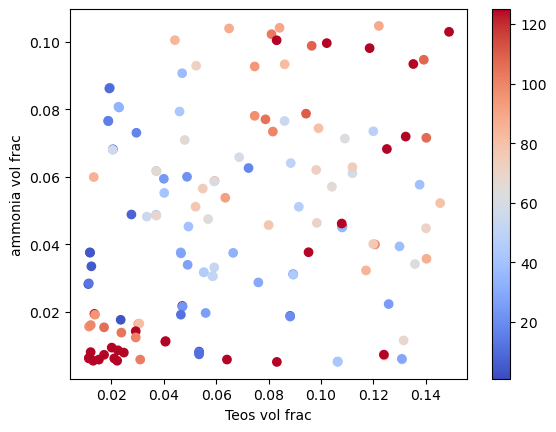

In [52]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table['teos_vol_frac'], synth_table['ammonia_vol_frac'], c = synth_table['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('ammonia vol frac')
cbar = fig.colorbar(sc, ax = ax)

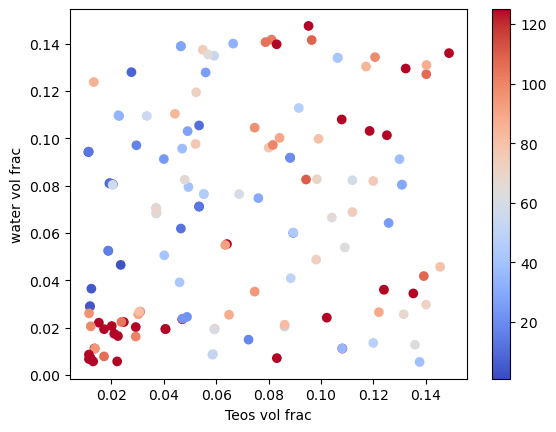

In [53]:
fig, ax = plt.subplots()

sc = ax.scatter(synth_table['teos_vol_frac'], synth_table['water_vol_frac'], c = synth_table['rank'], cmap = plt.cm.coolwarm)
ax.set_xlabel('Teos vol frac')
ax.set_ylabel('water vol frac')
cbar = fig.colorbar(sc, ax = ax)